# Assignment 5

In [1]:
import pandas as pd

In [2]:
lifeExpectancy = pd.read_csv("lifeExpectancyAtBirth.csv", sep=",")

In [3]:
lifeExpectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


In [4]:
filteredTable = lifeExpectancy[(lifeExpectancy.Period == 2019) & (lifeExpectancy.Dim1 == "Both sexes")]
filteredTable.head()
column = "First Tooltip"

## Univariate Analysis
Overview of life expectancy

<AxesSubplot:ylabel='Frequency'>

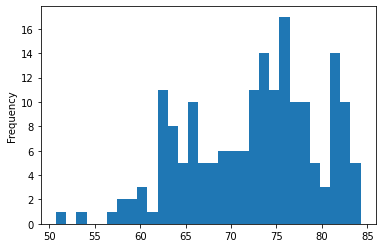

In [5]:
filteredTable[column].plot(kind="hist", bins=30)

We can determine that the average age is around 74 years. With a maximum of about 85 years and a minumum of about 51 years.

<AxesSubplot:>

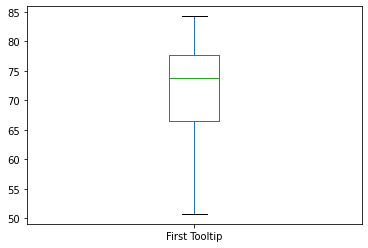

In [6]:
filteredTable[column].plot(kind="box")

Here we sorted the table based on the age. You can easily see the bottom 5 and top 5 countries this way.

In [7]:
filteredTable.sort_values(by=column).loc[:, ["Location", column]]

,Location,First Tooltip
1117,Lesotho,50.75
373,Central African Republic,53.10
1801,Somalia,56.47
661,Eswatini,57.73
1333,Mozambique,58.14
...,...,...
1837,Spain,83.22
1753,Singapore,83.22
1573,Republic of Korea,83.30
1897,Switzerland,83.45


In [8]:
filteredTable[column].describe()

count    183.000000
mean      72.540492
std        7.129956
min       50.750000
25%       66.550000
50%       73.740000
75%       77.730000
max       84.260000
Name: First Tooltip, dtype: float64

# Assignment 6


In [9]:
vgSales = pd.read_csv("../Assignment 4/vgsales.csv")
pd.set_option('display.max_columns', None)
vgSales.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


## Univariate Analysis: Categorical data
### Platforms
Here's a top 10 of all platforms.

In [10]:
vgSales["Platform"].value_counts().head(10)

PC      10978
PS2      3564
DS       3292
PS       2703
XBL      2115
PSN      2004
PS3      1870
PSP      1804
PS4      1755
X360     1701
Name: Platform, dtype: int64

Here is a top 20 in a bar graph without the pc category since it's too much of an outlier

<AxesSubplot:>

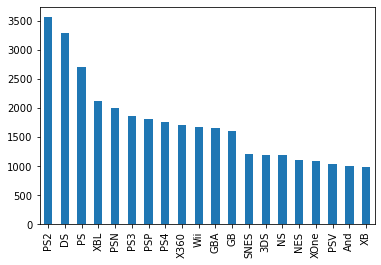

In [11]:
vgSales["Platform"].value_counts()[1:].head(20).plot(kind="bar")

### Genres

It seems that it's harder to pricely categorize games than it is movies since most games have a genre of "Misc".

<AxesSubplot:>

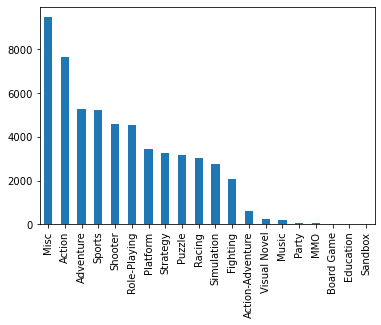

In [12]:
vgSales["Genre"].value_counts().plot(kind="bar")

Removing the 2 outliers "Misc" and "Action" shows a clearer picture. There are some interesting concusions we can take from this such as the fact that "Sandbox" is the lowest ranking genre despite the success of the game "Minecraft" which is a sandbox game. I assume this is because of the fact that the Sandbox genre is relatively new and usually made by smaller indie studios.

<AxesSubplot:>

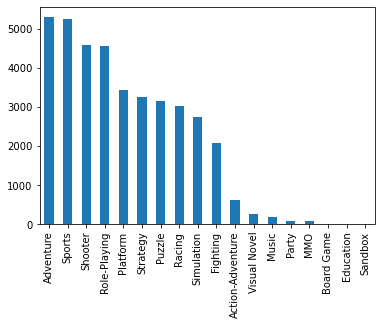

In [13]:
vgSales["Genre"].value_counts()[2:].plot(kind="bar")

We can also see that MMO's are ranked very low. This is for the opposite reason than the Sandbox tho. MMO's are a relatively niche genre, however they do require a massive internet infrastructure behind it to support the massive amount of players that it might contain inside a single map. Therefore only established companies would consider making an MMO and even then, many of them don't.

<AxesSubplot:>

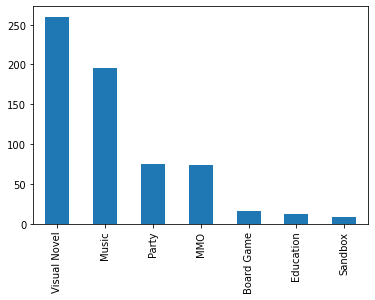

In [14]:
vgSales["Genre"].value_counts()[13:].plot(kind="bar")

## Univariate Analysis: Numerical data

### Critic Score
If we take a look at a general overview of all critical scores we can see that the average out of 10 rating lies around a 7,5. This might be odd when you assume that an out of 10 score would have an average of 5. But in reality that isn't the case. This is why it isn't so odd to think of a game that got a 6/10 as quite mediocre. We can also see that the lowest "normal" score a game gets is a little bit lower than a 4. Anything below that is an outlier.

count    6536.000000
mean        7.213709
std         1.454079
min         1.000000
25%         6.400000
50%         7.500000
75%         8.300000
max        10.000000
Name: Critic_Score, dtype: float64

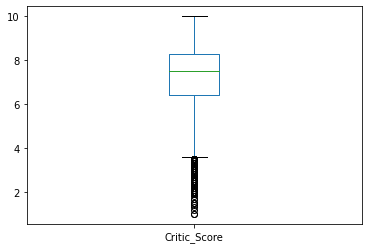

In [15]:
vgSales["Critic_Score"].plot(kind="box")
vgSales["Critic_Score"].describe()

<AxesSubplot:ylabel='Frequency'>

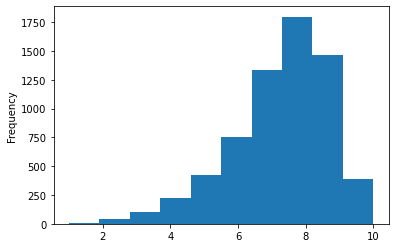

In [16]:
vgSales["Critic_Score"].plot(kind="hist")

### Total shipped

I've sorted the table by total shipped games and listed the top 20 games based on the amount shipped. It's interesting to note that mutiple of these games come in a bundle with the console they are for. Such as Wii sports and Super Mario Bros. I thought it would also be interesting to show  the Critic_Score alongside it. Where we can easily see that some games such as Wii Play were masively succesfull despite not being received well by critics.

In [26]:
vgSales.sort_values(by=["Total_Shipped"], ascending=False)[["Name", "Total_Shipped", "Critic_Score"]].head(20)

,Name,Total_Shipped,Critic_Score
0,Wii Sports,82.86,7.7
1,Super Mario Bros.,40.24,10.0
2,Mario Kart Wii,37.14,8.2
3,PlayerUnknown's Battlegrounds,36.60,NaN
4,Wii Sports Resort,33.09,8.0
5,Pokemon Red / Green / Blue Version,31.38,9.4
6,New Super Mario Bros.,30.80,9.1
7,Tetris,30.26,NaN
8,New Super Mario Bros. Wii,30.22,8.6
9,Minecraft,30.01,10.0


Here is a list of the best scored games sorted by the amount of sales they had. Omitting games without shipping data.

In [28]:
vgSales[(vgSales.Total_Shipped > 0)].sort_values(by=["Critic_Score","Total_Shipped"], ascending=False)[["Name", "Total_Shipped", "Critic_Score"]].head(20)

,Name,Total_Shipped,Critic_Score
1,Super Mario Bros.,40.24,10.0
9,Minecraft,30.01,10.0
106,Super Mario Kart,8.76,10.0
289,The Legend of Zelda: A Link to the Past,4.61,10.0
1246,Final Fantasy II,1.70,10.0
1340,The Legend of Zelda: Breath of the Wild,1.61,10.0
1509,Final Fight,1.48,10.0
48,Super Mario Odyssey,13.76,9.9
71,The Legend of Zelda: Breath of the Wild,11.68,9.9
127,The Legend of Zelda: Ocarina of Time,7.60,9.9
